In [1]:
import sys; sys.path.append('../')
import warnings
warnings.filterwarnings('ignore')

from src.data_loader import load_data

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

In [2]:
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('seaborn-whitegrid')

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier, RandomForestClassifier, VotingClassifier)
from sklearn.svm import SVC
models = [
    LinearDiscriminantAnalysis, KNeighborsClassifier, GaussianNB,
    DecisionTreeClassifier, AdaBoostClassifier,
    RandomForestClassifier, SVC, ExtraTreesClassifier
]

In [4]:
import smote_variants as sv

#From https://smote-variants.readthedocs.io/en/latest/ranking.html
oversamplers = [
    sv.polynom_fit_SMOTE, sv.ProWSyn, sv.SMOTE_IPF, sv.Lee, sv.SMOBD, sv.G_SMOTE,
    sv.CCR, sv.LVQ_SMOTE, sv.Assembled_SMOTE, sv.SMOTE_TomekLinks
]

## Cluster Oversampling using SMOTE

In [5]:
clusters, _ = load_data('../data/all_clusters.txt')
clusters = clusters.drop(['file_origin', 'file_destination'], axis=1).reset_index()

In [6]:
#Delete columns with one value
for col in clusters.columns:
    if len(clusters[col].unique()) == 1:
        clusters.drop(col,inplace=True,axis=1)

        #Delete columns with one value
for col in clusters.columns:
    if len(clusters[col].unique()) == 1:
        clusters.drop(col,inplace=True,axis=1)

clusters['classification'] = (
    ((clusters['classification'] != 'Vegetation') & (clusters['classification'] != 'Limit_effect'))
)

In [7]:
data = clusters.replace('None', np.nan).dropna(axis=0)

X = data.drop('classification', axis=1)
X = (X - X.mean()) / X.std()
y = data['classification']

In [8]:
bar_plots = {}
for Oversampler in oversamplers:
    splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
    bar_plot = []
    for train_index, test_index in splitter.split(X, y):
        X_train, y_train = Oversampler().sample(X.iloc[train_index].values, y.iloc[train_index].values)
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]

        performances = []
        for Model in models:
            try:
                model = Model()
                model.fit(X_train, y_train)

                y_pred = model.predict(X_test)
                performances.append([
                    Model.__name__, len(y_pred),
                    sum(y_pred), sum(y_test),
                    sum(y_test & y_pred),
                    X_test[~y_pred & y_test]['volume'],
                    classification_report(y_test, y_pred, output_dict=True)
                ])
            except Exception as e:
                print(e)
        bar_plot.append(performances)
    bar_plots[Oversampler.__name__] = bar_plot

2019-12-30 10:27:58,876:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2019-12-30 10:28:05,648:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2019-12-30 10:28:12,290:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2019-12-30 10:28:18,674:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2019-12-30 10:28:25,084:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2019-12-30 10:28:31,653:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2019-12-30 10:28:38,072:INFO:polynom_fit_SMOTE: Running sampling

2019-12-30 10:31:53,609:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-qCE1QqFz/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-30 10:31:59,856:INFO:SMOTE_IPF: Removing 0 elements
2019-12-30 10:32:06,076:INFO:SMOTE_IPF: Removing 0 elements
2019-12-30 10:32:12,879:INFO:SMOTE_IPF: Removing 0 elements
2019-12-30 10:32:18,769:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n                       max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, p

2019-12-30 10:36:21,012:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")
2019-12-30 10:36:26,874:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")
2019-12-30 10:36:32,500:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")
2019-12-30 10:36:38,442:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")
2019-12-30 10:36:44,703:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None}")
2019-12-30 10:36:50,157:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'e

2019-12-30 10:42:59,590:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval
2019-12-30 10:43:08,001:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-30 10:43:08,002:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs/point-cloud-learn-qCE1QqFz/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2019-12-30 10:43:08,048:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval
2019-12-30 10:43:16,963:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-12-30 10:43:16,964:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nicolas/.local/share/virtualenvs

In [9]:
THRESHOLD = 0.7

def extract_statistics(bar_plot):
    ground_truth = bar_plot[0][0][3]
    tp_tfs, tp_tfs_err, tps, tps_err, f1s, f1s_err = [], [], [], [], [], []
    for model_index, model in enumerate([e[0] for e in bar_plot[0]]):
        tp_fp, tp, f1 = [], [], []
        for split in bar_plot:
            tp_fp.append(split[model_index][2])
            tp.append(split[model_index][4])
            f1.append(split[model_index][-1]['True']['f1-score']) 

        tp_tfs.append(np.array(tp_fp).mean())
        tp_tfs_err.append(np.array(tp_fp).std())
        tps.append(np.array(tp).mean())
        tps_err.append(np.array(tp).std())
        
        if (tps[-1] / ground_truth) >= THRESHOLD:
            f1s.append(np.array(f1).mean())
            f1s_err.append(np.array(f1).std()) 
        else:
            f1s.append(0)
            f1s_err.append(0)
    return tp_tfs, tp_tfs_err, tps, tps_err, f1s, f1s_err

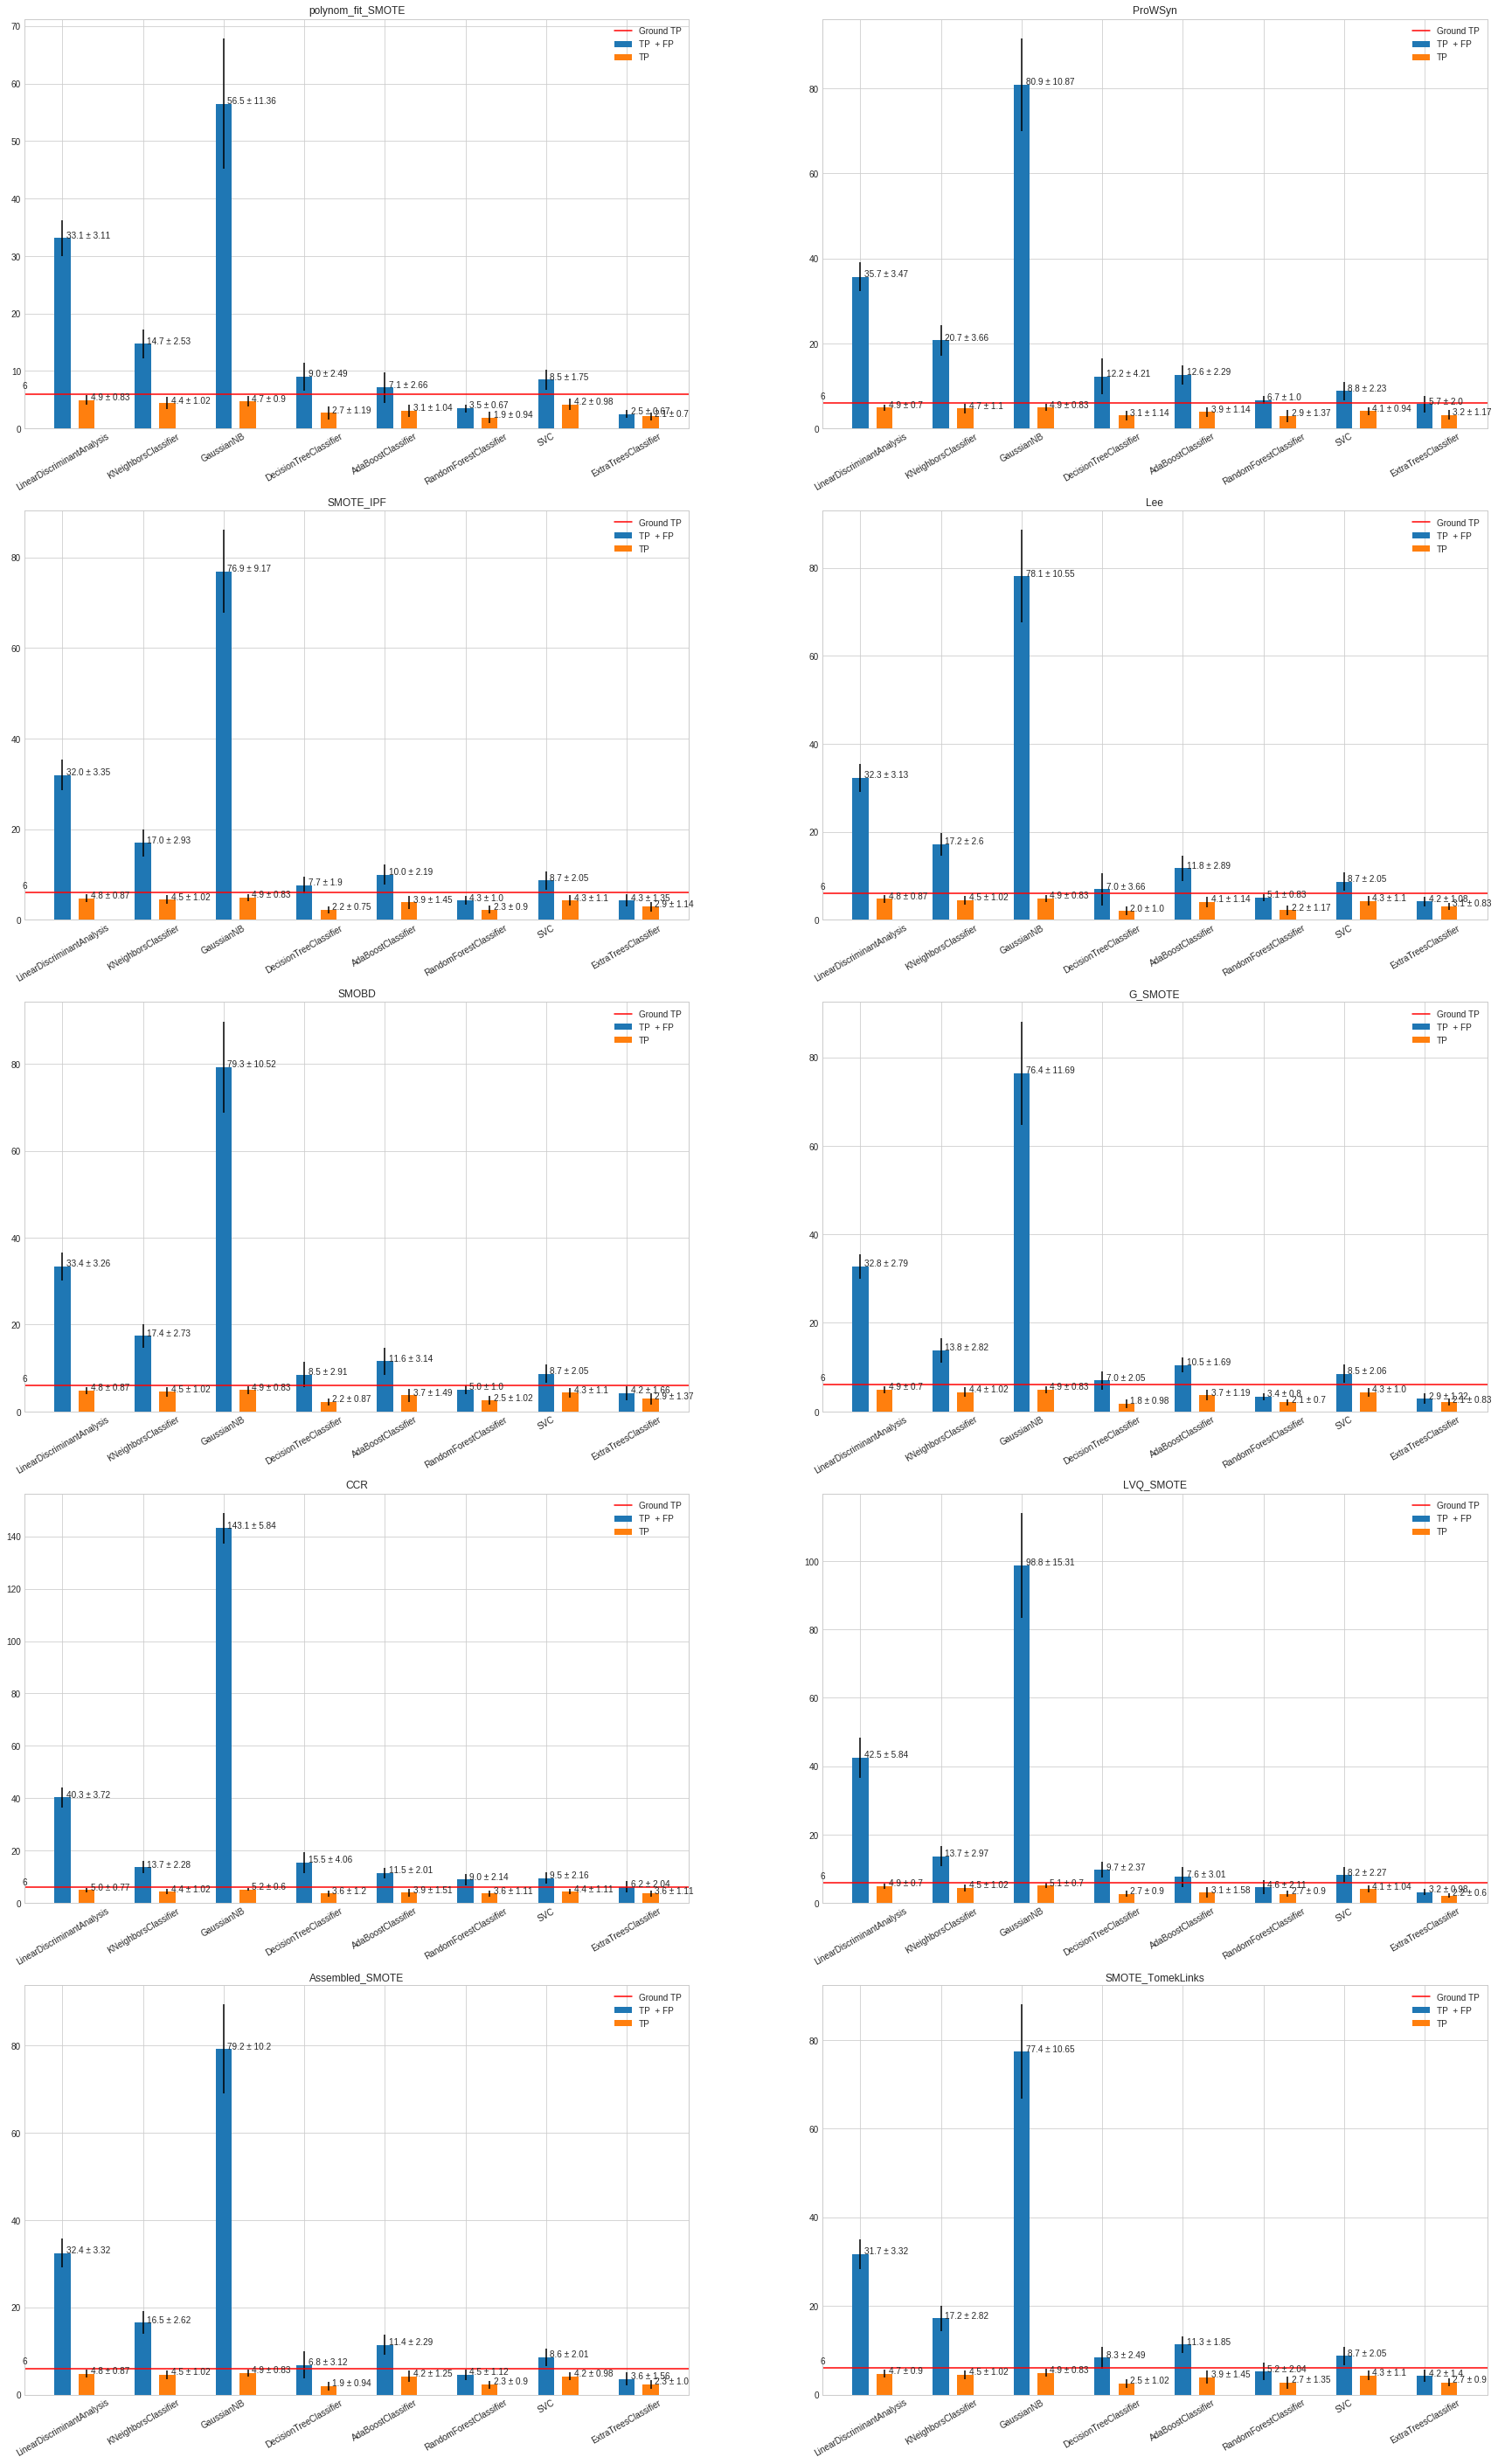

In [10]:
from src.utils.visualization import plot_trues
import pickle
plt.rcParams["figure.figsize"] = (30,50)

for i, bar_plot in enumerate(bar_plots):
    name = bar_plot
    bar_plot = bar_plots[name]
    
    tp_tfs, tp_tfs_err, tps, tps_err, *_ = extract_statistics(bar_plot)
    
    with open(f'{name}.pickle', 'wb') as fh:
        pickle.dump(
            {
                'ground_truth': bar_plot[0][0][3],
                'tp_tfs': tp_tfs,
                'tp_tfs_err': tp_tfs_err,
                'tps': tps,
                'tps_err': tps_err,
                'labels': [e[0] for e in bar_plot[0]]
            }, fh
        )
    
    
    plt.subplot(5,2,i+1)
    plt.title(name)
    
    ground_truth = bar_plot[0][0][3]
    labels = [e[0] for e in bar_plot[0]]
    plot_trues(
        tps=tps, tps_tfs=tp_tfs, gt=ground_truth,
        labels=labels, tps_err=tps_err, tps_tfs_err=tp_tfs_err
    )

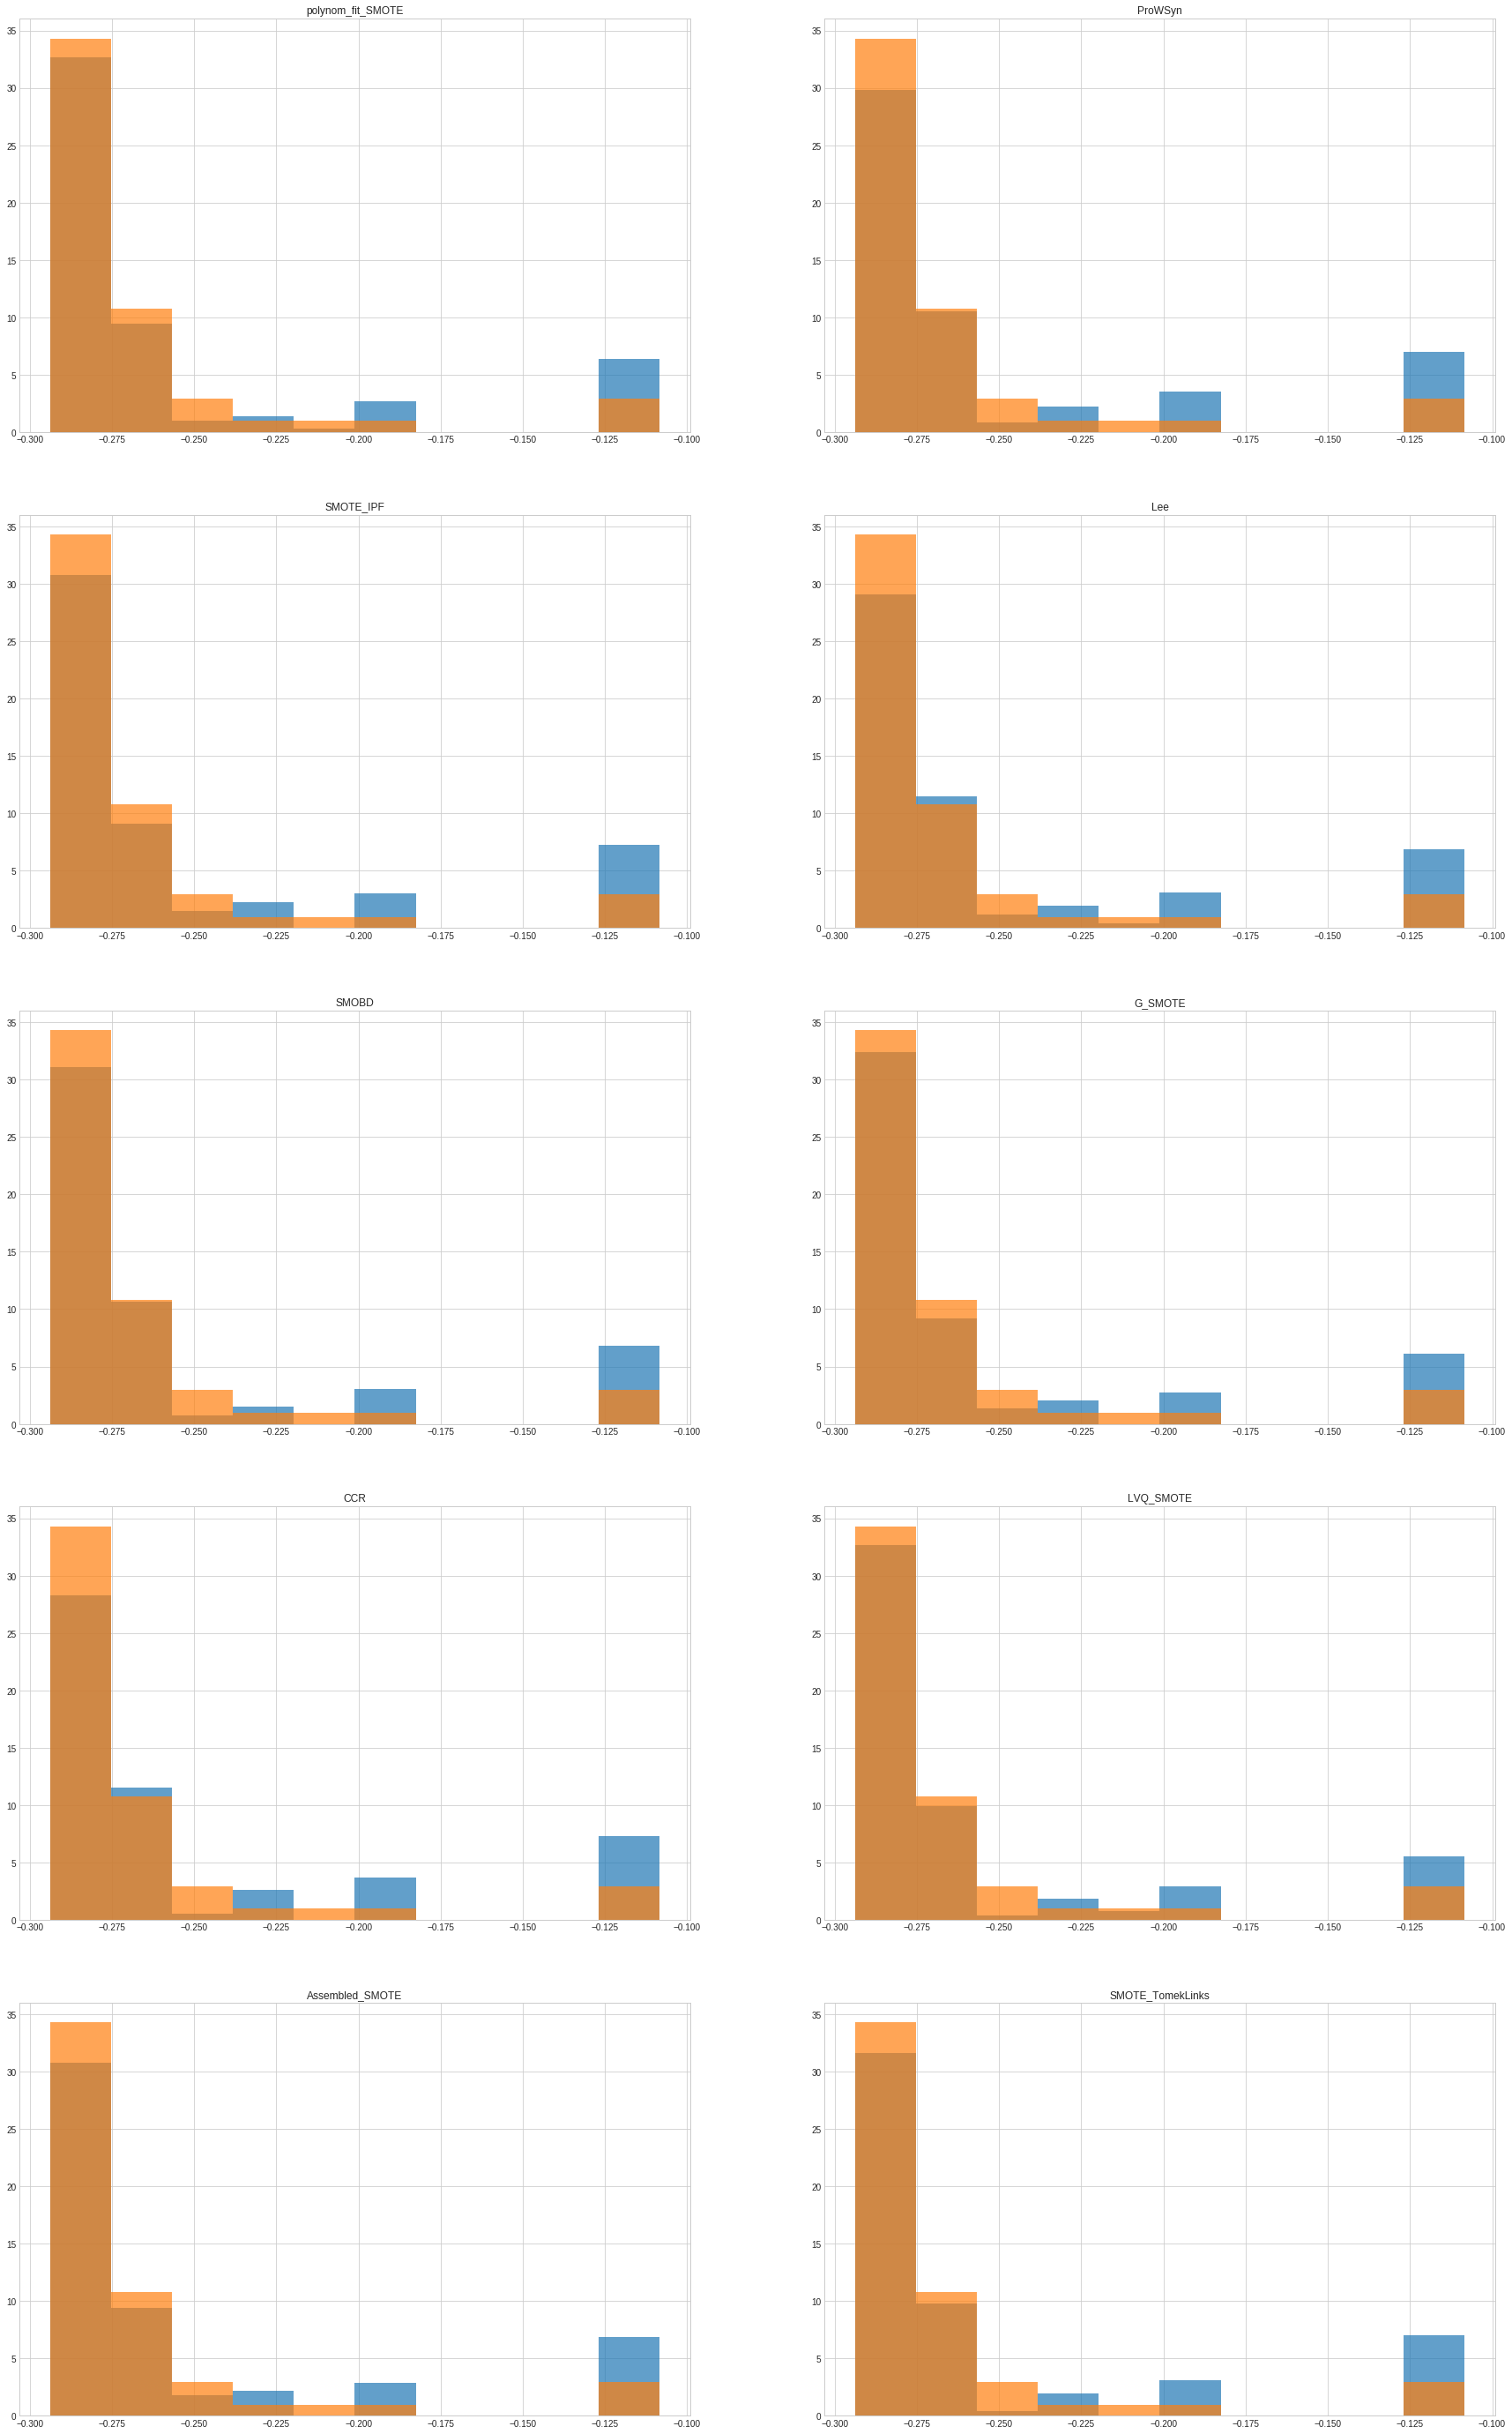

In [11]:
for i, bar_plot in enumerate(bar_plots):
    plt.subplot(5,2,i+1)
    volumes = []
    plt.title(bar_plot)
    bar_plot = bar_plots[bar_plot]
    [[[volumes.append(volume) for volume in method[-2].values] for method in split]for split in bar_plot]
    plt.hist(volumes, normed=True, alpha=0.7)
    plt.hist(X[y]['volume'], normed=True, alpha=0.7)

polynom_fit_SMOTE (SVC): 0.6007051282051282 +/- 0.1373442725818786
ProWSyn (KNeighborsClassifier): 0.3706125275332607 +/- 0.11366463818338324
SMOTE_IPF (SVC): 0.6029069459951812 +/- 0.13387503940239076
Lee (SVC): 0.6029069459951812 +/- 0.13387503940239076
SMOBD (SVC): 0.6029069459951812 +/- 0.13387503940239076
G_SMOTE (SVC): 0.6128977884860237 +/- 0.12629442583563216
CCR (SVC): 0.5880158730158731 +/- 0.1479499832067047
LVQ_SMOTE (KNeighborsClassifier): 0.47594896331738434 +/- 0.11711422504870081
Assembled_SMOTE (SVC): 0.594573612661848 +/- 0.1268699147745886
SMOTE_TomekLinks (SVC): 0.6029069459951812 +/- 0.13387503940239076


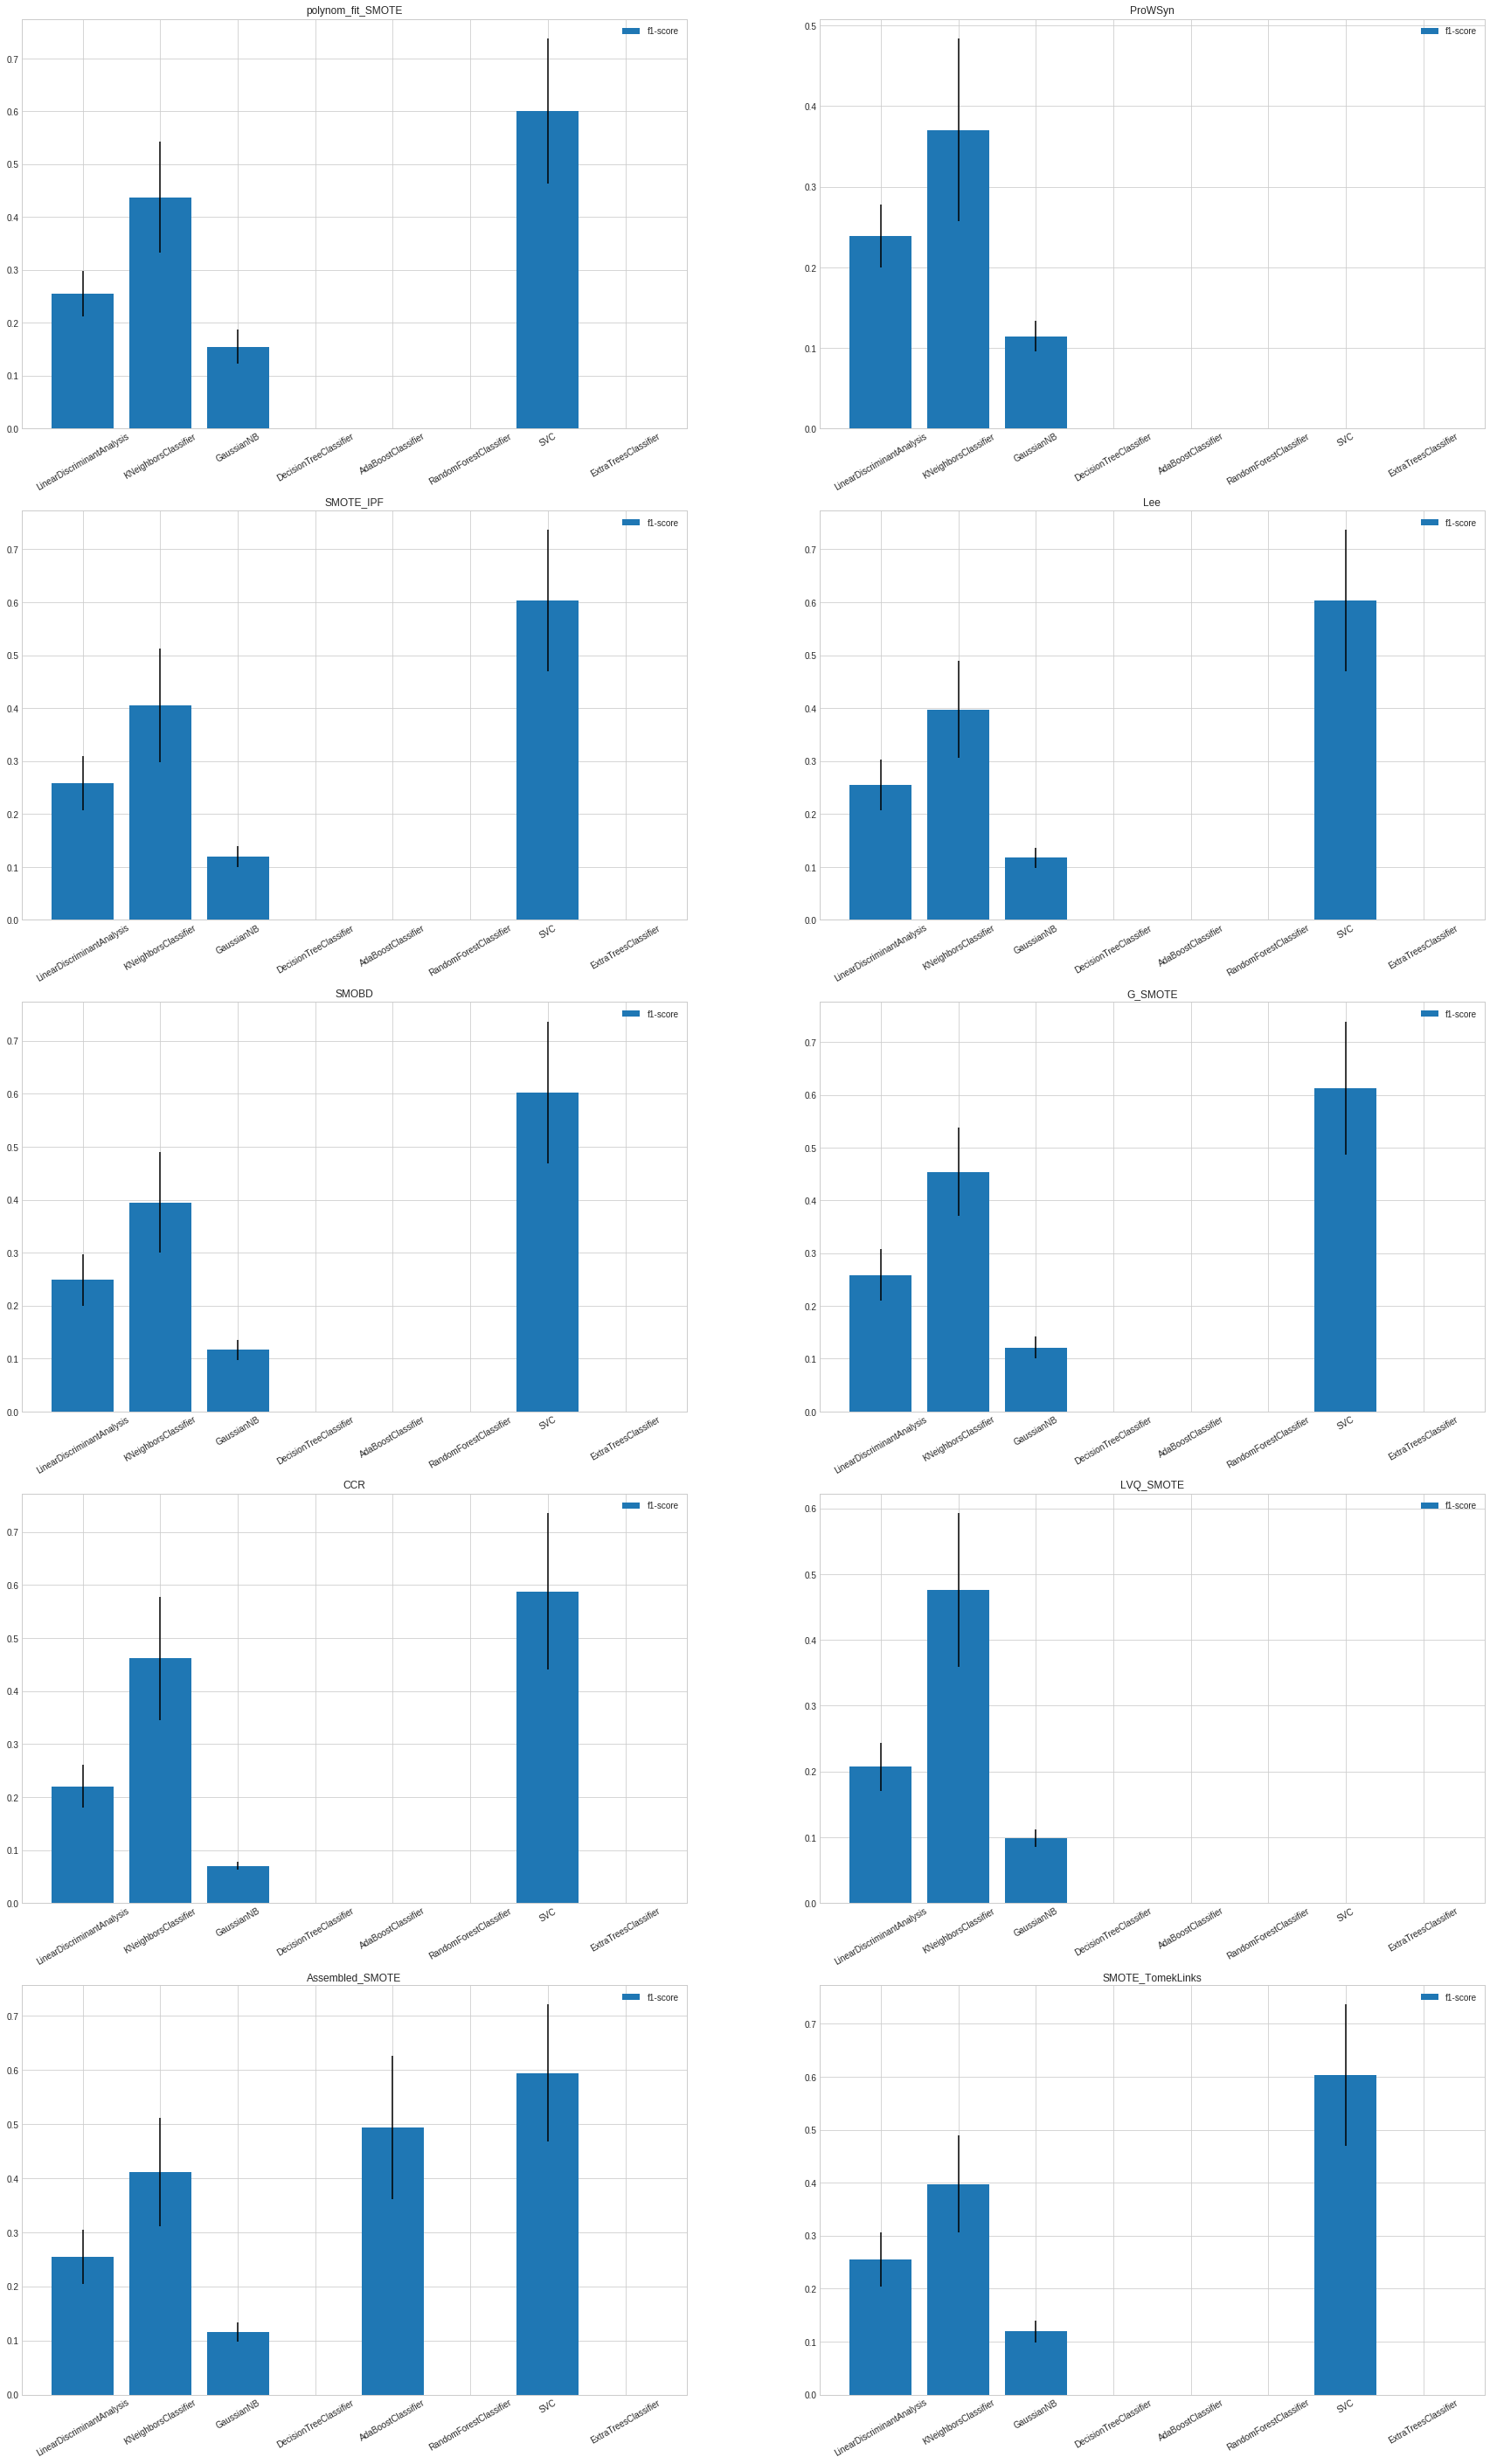

In [12]:
from src.utils.visualization import plot_trues
plt.rcParams["figure.figsize"] = (30,50)

for i, bar_plot in enumerate(bar_plots):
    name = bar_plot
    bar_plot = bar_plots[name]
    plt.subplot(5,2,i+1)
    plt.title(name)
    
    tp_tfs, tp_tfs_err, tps, tps_err, f1s, f1s_err = extract_statistics(bar_plot)
    
    x = np.arange(len(f1s))
    plt.bar(x, f1s, yerr=f1s_err, label='f1-score')

    plt.xticks(x, labels, rotation=30)
    plt.legend()
    i_max = np.argmax(f1s)
    
    labels = [e[0] for e in bar_plot[0]]

    print(f'{name} ({labels[i_max]}):', f1s[i_max], '+/-' ,f1s_err[i_max])